In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [6]:
import numpy as np

class KNN_Regression:
    def __init__(self, distance):
        self.distance = distance

    def get_distance(self, training_data_point, test_data_point):#Calculate the distance between a training and test data point

        if self.distance == 'euclidean':
            distance = 0
            for i in range(len(training_data_point) - 1):
                distance += (training_data_point[i] - test_data_point[i]) ** 2
            return np.sqrt(distance)

        elif self.distance == 'manhattan':
            distance = 0
            for i in range(len(training_data_point) - 1):
                distance += abs(training_data_point[i] - test_data_point[i])
            return distance

    def nearest_neighbors(self, X_train, test_data, k):#Find the k-nearest neighbors based on the selected distance metric

        dist_list = []
        for training_data in X_train:
            distance = self.get_distance(training_data, test_data)
            dist_list.append((distance, training_data))

        dist_list.sort(key=lambda x: x[0])  # Sort by distance

        # Select the k closest neighbors
        neighbors_list = [dist_list[i][1] for i in range(k)]

        return neighbors_list

    def predict(self, X_train, test_data, k):#Predict the output for a test sample by averaging k-nearest neighbors' values

        neighbors = self.nearest_neighbors(X_train, test_data, k)
        labels = [data[-1] for data in neighbors]

        return np.mean(labels)


In [7]:
df =pd.read_csv('/content/Ecommerce Customers.csv',delimiter=',')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [8]:
new_df =df.iloc[:,3:]
new_df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [10]:
new_df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [11]:
X = np.array(new_df.drop(columns='Yearly Amount Spent',axis=1))
Y = np.array(new_df['Yearly Amount Spent'])

In [12]:
print(X)
print(Y)

[[34.49726773 12.65565115 39.57766802  4.08262063]
 [31.92627203 11.10946073 37.26895887  2.66403418]
 [33.00091476 11.33027806 37.11059744  4.1045432 ]
 ...
 [32.64677668 11.49940906 38.33257633  4.95826447]
 [33.32250105 12.39142299 36.84008573  2.33648467]
 [33.71598092 12.41880832 35.77101619  2.73515957]]
[587.95105397 392.20493344 487.54750487 581.85234404 599.40609205
 637.10244792 521.57217476 549.90414611 570.20040896 427.1993849
 492.60601272 522.33740461 408.64035107 573.41586733 470.4527333
 461.7807422  457.84769594 407.70454755 452.31567548 605.0610388
 534.70574381 419.93877484 436.51560573 519.34098913 700.91709162
 423.17999168 619.89563986 486.83893477 529.53766534 554.72208383
 497.5866713  447.68790654 588.71260551 491.07322368 507.44183234
 521.88357317 347.77692663 490.73863214 478.17033405 537.84619527
 532.75178758 501.87443028 591.19717818 547.24434342 448.22982919
 549.86059046 593.91500297 563.67287336 479.73194909 416.35835358
 725.58481406 442.66725174 384.

In [28]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (500, 4)
Shape of Y: (500,)


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [26]:
print("Values of the X =",X_train.shape,X_test.shape)

Values of the X = (400, 5) (100, 4)


In [27]:
print("Values of the Y =",Y_train.shape,Y_test.shape)

Values of the Y = (400,) (100,)


In [15]:
X_train = np.insert(X_train,4,Y_train,axis=1)

In [16]:
print(X_train)

[[ 31.86274111  14.03986726  37.02226899   3.73822517 556.29814117]
 [ 34.69559119  11.60899707  37.68487728   3.16309193 510.40138845]
 [ 33.76206924   9.9845144   35.9334493    3.85547168 451.45744687]
 ...
 [ 32.0609144   12.62543264  35.53914243   5.41235784 627.60331871]
 [ 30.73772037  12.63660605  36.21376309   3.35784684 461.7807422 ]
 [ 33.644177    13.16002004  36.40774745   3.0151753  506.53639314]]


In [17]:
print(X_train[0:,-1])

[556.29814117 510.40138845 451.45744687 478.60091594 595.80381888
 482.83098586 467.50190043 549.00822693 549.90414611 630.42276323
 392.28524425 510.15981728 438.30370785 618.84597042 524.63796461
 604.33484007 447.3690272  558.94811239 642.10157873 475.0716299
 529.0566632  513.45057119 529.53766534 585.9318443  517.16513559
 501.92826487 532.72480546 441.89663152 408.62018783 712.39632681
 385.15233799 510.50147847 542.41247673 660.42518429 442.72289157
 398.16346853 444.96655165 468.91350132 521.19531053 385.09500707
 407.80403064 497.5866713  452.12262509 492.60601272 626.01867266
 407.70454755 402.16712222 461.62827839 424.2028271  461.79095906
 571.30749488 443.44186006 505.11963753 537.77316254 374.26967454
 399.9838716  554.72208383 423.3083341  463.92351299 440.00274755
 591.78108943 616.66028602 502.13278923 514.08895775 458.37691065
 298.76200786 489.9080531  471.60288439 581.85234404 591.19717818
 490.20659998 503.17508519 421.96679419 407.54216801 449.07031944
 482.144996

In [18]:
regression = KNN_Regression('manhattan')

In [19]:
prediction = regression.predict(X_train,X_test[0],5)

In [20]:
print(Y_test[0])

431.6177337614297


In [21]:
print(prediction)

437.41339656425714


In [22]:
Y_pred = []
for i in range(len(X_test)):
  prediction = regression.predict(X_train,X_test[i],3)
  Y_pred.append(prediction)

In [23]:
print(Y_pred)

[442.1080566352211, 503.6401988762206, 494.7424874802817, 487.03060470308463, 320.25186101529414, 488.48211371872094, 405.0844969667925, 564.7997467192504, 502.73381563986663, 599.0584406744538, 504.7351862208673, 419.3386779911967, 430.73912205614926, 557.4315477653347, 482.3269070293609, 558.6605670876557, 538.8008582682259, 528.8062595327347, 441.1626008580137, 541.2638775803711, 440.68652134061716, 520.5183712505128, 540.8809635503625, 488.1098070459739, 666.734507514476, 442.64445703137716, 414.74838580602403, 564.4607760331984, 419.20508419870765, 533.0137191001846, 529.0694790323132, 509.229941288258, 629.9987441193308, 526.1879593677698, 473.52029176339346, 419.9713981723071, 394.85232196590505, 339.2609628858316, 471.10351537886413, 359.1601250883182, 540.596703264636, 619.8553108508248, 474.47860170178063, 510.7116954118128, 466.967109139521, 492.04416152257915, 469.01691088310645, 434.02832237174266, 474.4725882164335, 552.7619787219215, 455.1030985813025, 403.4709618624902,

In [24]:
print(r2_score(Y_test,Y_pred))

0.886988293351217


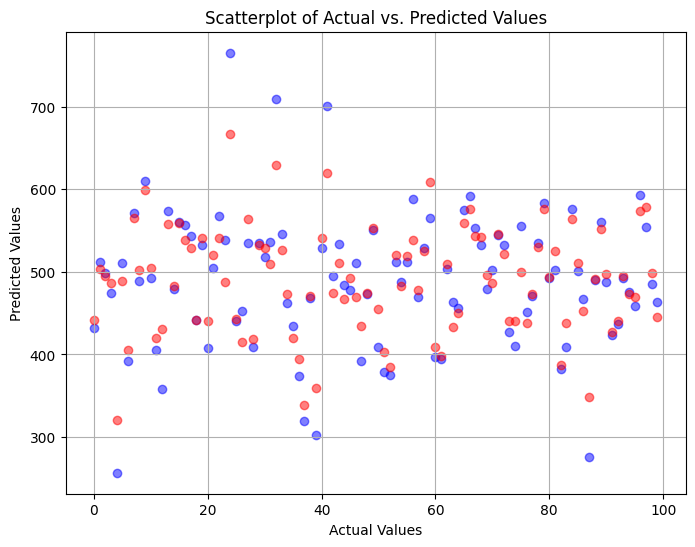

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(Y_test)), Y_test, color='blue', alpha=0.5)
plt.scatter(np.arange(len(Y_test)), Y_pred, color='red', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatterplot of Actual vs. Predicted Values")
plt.grid()
plt.show()